# Result

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/danhtaihoang/hidden-variables/master?filepath=sphinx%2Fcodesource%2Fhidden.ipynb)

We will demontrade in the following the performance of our method in analyzing binary data that is generated from the kinetic Ising model. Using configurations of a subset of variables, we will recover the interactions (including observed to observed, hidden to observed, observed to hidden, and hidden to hidden), the configurations of hidden variables, and the number of hidden variables.

First of all, we import the necessary packages to the jupyter notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import simulate
import inference
%matplotlib inline

np.random.seed(1)

We consider a system of `n0` variables interacting each others with interaction variability parameter `g`.

In [2]:
# parameter setting:
n0 = 40  # number of variables
g = 4.0  # interaction variability parameter

w0 = np.random.normal(0.0,g/np.sqrt(n0),size=(n0,n0))

Using the function `simulate.generate_data`, we then generate a time series of variable states according to the kinetic Ising model with a data length `l`.

In [3]:
l = int(4*(n0**2))

s0 = simulate.generate_data(w0,l)

A raster of variable configurations `s0` is plotted:

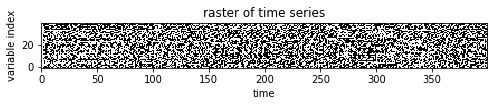

In [4]:
plt.figure(figsize=(8,6))
plt.title('raster of time series')
plt.imshow(s0.T[:,:400],cmap='gray',origin='lower')
plt.xlabel('time')
plt.ylabel('variable index')
plt.show()

Using the configurations of entire system `s0`, we can infer sucessfully the interactions between variables:

In [5]:
w = inference.fem(s0)

We plot the heat map of the actual interaction matrix `w0`, the inferred interaction matrix `w`, and the error inference, i.e., the discrepancy between `w0` and `w`.

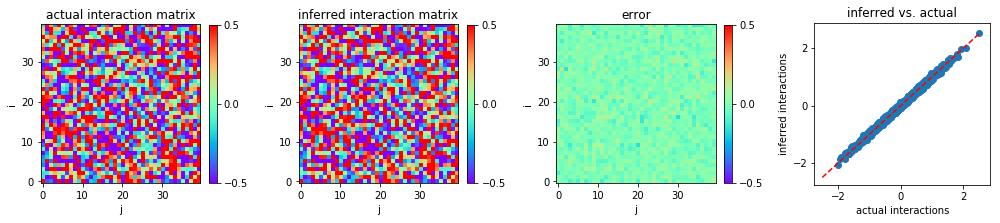

In [6]:
plt.figure(figsize=(14,3.2))

plt.subplot2grid((1,4),(0,0))
plt.title('actual interaction matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,1))
plt.title('inferred interaction matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,2))
plt.title('error')
plt.imshow(w0-w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,3))
plt.title('inferred vs. actual')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.scatter(w0,w)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

However, in the real world data, it is likely that we do not observe the configurations of entire system, but only a subset of variables. For instance, there exists `nh0` hidden variables. So that, the number of observed variables is `n = n0 - nh0` and the observed configurations is `s = s0[:,:n]`.

In [7]:
nh0 = 15
n = n0 - nh0
s = s0[:,:n].copy()

## Ignoring hidden variables

Let us see what happen if we ignore the existence of hidden variables and infer the interactions between the observations. Using the observed configurations `s`, we can infer the interactions between the observed variables:

In [8]:
w = inference.fem(s)

The heat map of the actual interaction matrix `w0`, the inferred interaction matrix `w` (only from observed to observed), and the error between them are plotted.

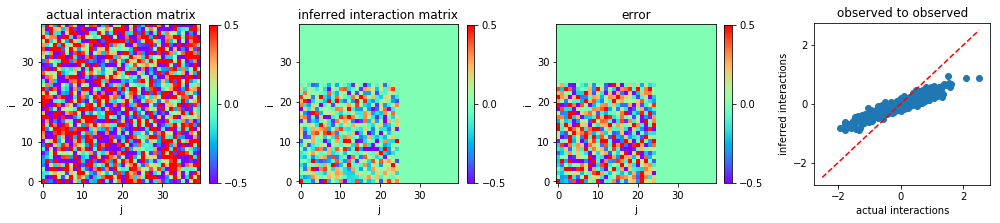

In [9]:
w_infer = np.zeros((n0,n0))
w_infer[:n,:n] = w

error = np.zeros((n0,n0))
error[:n,:n] = w0[:n,:n] - w

#-------------------------------------
plt.figure(figsize=(14,3.2))

plt.subplot2grid((1,4),(0,0))
plt.title('actual interaction matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,1))
plt.title('inferred interaction matrix')
plt.imshow(w_infer,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,2))
plt.title('error')
plt.imshow(error,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,4),(0,3))
plt.title('observed to observed')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.scatter(w0[:n,:n],w_infer[:n,:n])
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

As expected, ignoring hidden variables leads to a poor inferred result.

In the following, we will take into account the existance of hidden variables.

## Including hidden variables
### Inferring interactions

We first assume that the number of hidden variables is known, `nh = nh0`. The interactions is then inferred by using  the function `inference.infer_hidden`.

In [10]:
nh = nh0

cost_obs,w,sh = inference.infer_hidden(s,nh,method='fem')

To compare the inferred interactions with the actual interactions, we use the function `inference.hidden_coordinate` to identify which inferred hidden variable corresponding to which actual hidden variable.

In [11]:
w,sh = inference.hidden_coordinate(w0,s0,w,sh)

Now, we plot the the heat map of the actual interaction matrix `w0`, the inferred interaction matrix `w` (including observed to observed, hidden to observed, observed to hidden, and hidden to hidden), and the error between them.

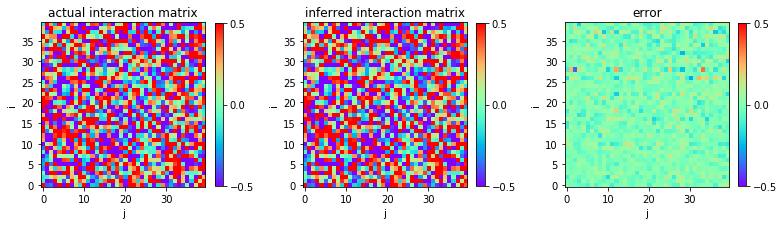

In [12]:
plt.figure(figsize=(11,3.2))

plt.subplot2grid((1,3),(0,0))
plt.title('actual interaction matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,1))
plt.title('inferred interaction matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,3),(0,2))
plt.title('error')
plt.imshow(w0-w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

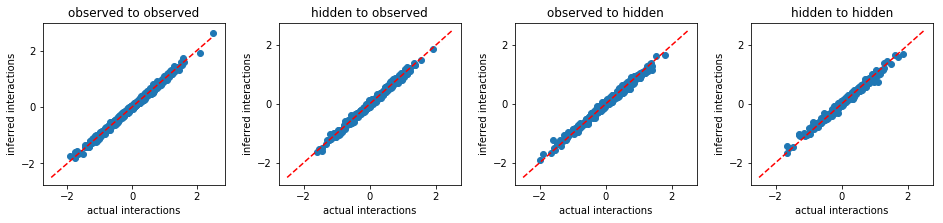

In [13]:
plt.figure(figsize=(13.2,3.2))

plt.subplot2grid((1,4),(0,0))
plt.title('observed to observed')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.scatter(w0[:n,:n],w[:n,:n])
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.subplot2grid((1,4),(0,1))
plt.title('hidden to observed')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.scatter(w0[:n,n:],w[:n,n:])
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.subplot2grid((1,4),(0,2))
plt.title('observed to hidden')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.scatter(w0[n:,:n],w[n:,:n])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.subplot2grid((1,4),(0,3))
plt.title('hidden to hidden')
plt.plot([-2.5,2.5],[-2.5,2.5],'r--')
plt.scatter(w0[n:,n:],w[n:,n:])
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel('actual interactions')
plt.ylabel('inferred interactions')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

So we can infer accurately the interactions, not only observed to observed, but also hidden to observed, observed to hidden, and hidden to hidden.

### Inferring configurations of hidden variables

Our algorithm allows us to infer the configurations of hidden variables simultaneously with the interactions in the previous step. The acurracy of the inference is calculated as  

In [14]:
accuracy = 1 - (np.abs(s0[:,n:]-sh)/2.).mean()
print('inference accuracy: %2.2f %%'%(accuracy*100))

inference accuracy: 95.85 %


### Inferring number of hidden variables

In the above sections, we recovered the interactions and configurations of hidden variables by using the right number of hidden variables, `nh= nh0`. However, in the real world problems, the number of hidden variables may not be accessible. In the following, we apply our method for various number of hidden variables `nh` and compute the discrepancies of observed variables `cost_obs` and entire system `cost`. 

In [15]:
nh_list = [11,13,15,17,19,21]
nnh = len(nh_list)

def discrepancy(nh):
    return inference.infer_hidden(s,nh,method='fem')[0]

import multiprocessing
nPC = min(nnh,multiprocessing.cpu_count())
pool = multiprocessing.Pool(processes=nPC)
cost_obs_list = pool.map(discrepancy,nh_list)
pool.close()

cost_obs = np.array([cost_obs_list[i][-1] for i in range(nnh)])
cost = np.array([cost_obs[i]*(1+float(nh_list[i])/n) for i in range(nnh)])

We plot the discrepancies of observed variables `cost_obs` and entire system `cost` as function of hidden variables.  The minimum of `cost` corresponds to the true value of number of hidden variables.

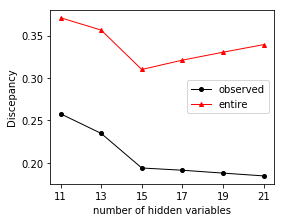

In [16]:
plt.figure(figsize=(4,3.2))

plt.plot(nh_list,cost_obs,'ko-',linewidth=1,markersize=4,label='observed')
plt.plot(nh_list,cost,'r^-',linewidth=1,markersize=4,label='entire')
plt.xticks(nh_list)
plt.xlabel('number of hidden variables')
plt.ylabel('Discepancy')
plt.legend()
plt.show()

So we can infer number of hidden variables based on `cost`.